<a href="https://colab.research.google.com/github/sweetiepickle/AI-2023-midterm-report/blob/main/AI_midterm_money_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

money classification

In [18]:
#libraries
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

In [19]:
# data -> model -> compile -> evaluate

In [21]:
# step 1 : data initializing 

# orginal value of an image is from 0 to 255
# target value is from 0 to 1
resizeData = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)    
trainingData= resizeData.flow_from_directory("/content/drive/MyDrive/AI 2023/data/VN money/train",target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2718 images belonging to 12 classes.


In [22]:
# folder classifying
trainingData.class_indices

{'0k': 0,
 '100k': 1,
 '10k': 2,
 '1k': 3,
 '200k': 4,
 '200đ': 5,
 '20k': 6,
 '2k': 7,
 '500k': 8,
 '500đ': 9,
 '50k': 10,
 '5k': 11}

In [45]:
# step 2 : cnn netwwork  : sequential model
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

# Data flattening
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 150, 150, 32)      896       
                                                                 
 conv2d_107 (Conv2D)         (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_108 (Conv2D)         (None, 75, 75, 64)        18496     
                                                                 
 conv2d_109 (Conv2D)         (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                

In [46]:
# step 4 :compiling

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
model.fit(trainingData, batch_size = 128, epochs = 30 , verbose = 1)

Epoch 1/30
85/85 [==============================] - 495s 6s/step - loss: 2.5313 - accuracy: 0.0979
Epoch 2/30
85/85 [==============================] - 23s 264ms/step - loss: 2.4354 - accuracy: 0.1280
Epoch 3/30
85/85 [==============================] - 23s 269ms/step - loss: 2.3474 - accuracy: 0.1722
Epoch 4/30
85/85 [==============================] - 22s 263ms/step - loss: 2.1322 - accuracy: 0.2174
Epoch 5/30
85/85 [==============================] - 22s 260ms/step - loss: 1.9276 - accuracy: 0.2873
Epoch 6/30
85/85 [==============================] - 22s 258ms/step - loss: 1.6726 - accuracy: 0.3767
Epoch 7/30
85/85 [==============================] - 24s 285ms/step - loss: 1.5072 - accuracy: 0.4459
Epoch 8/30
85/85 [==============================] - 23s 270ms/step - loss: 1.2929 - accuracy: 0.5184
Epoch 9/30
85/85 [==============================] - 23s 270ms/step - loss: 1.2111 - accuracy: 0.5552
Epoch 10/30
85/85 [==============================] - 23s 265ms/step - loss: 1.1602 - accuracy

In [48]:
# step 5 : evaluating
eva = model.evaluate(trainingData, verbose = 1 )
# verbose = 0 -> display nothing
# verbose = 1 -> display only learns recently
# verbose = 2 -> display everything learnt
print('loss: ', eva[0])
print('accuracy: ', eva[1])

85/85 [==============================] - 21s 243ms/step - loss: 0.1848 - accuracy: 0.9367
loss:  0.18479594588279724
accuracy:  0.9367181658744812


In [50]:
model.save('/content/drive/MyDrive/AI 2023/model AI/ money classification.h5')

In [51]:
model_1=load_model('/content/drive/MyDrive/AI 2023/model AI/ money classification.h5')

1/1 [==============================] - 0s 23ms/step
0k


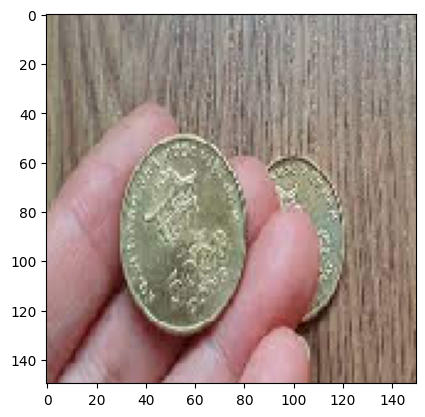

1/1 [==============================] - 0s 23ms/step
0k


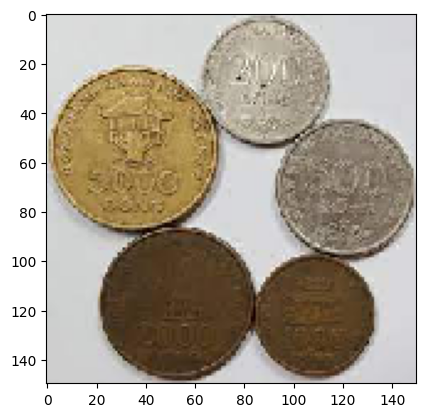

1/1 [==============================] - 0s 18ms/step
5k


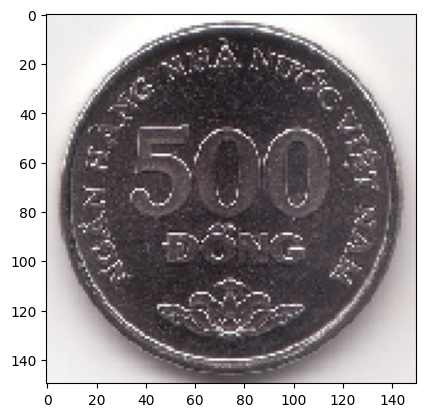

1/1 [==============================] - 0s 23ms/step
5k


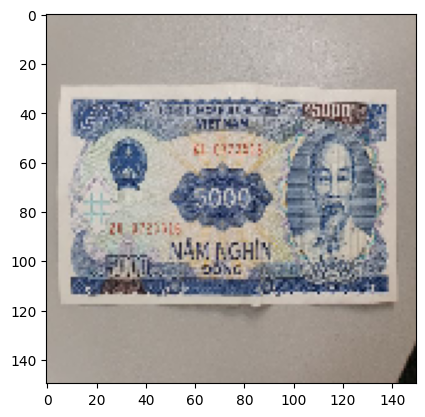

1/1 [==============================] - 0s 47ms/step
20k


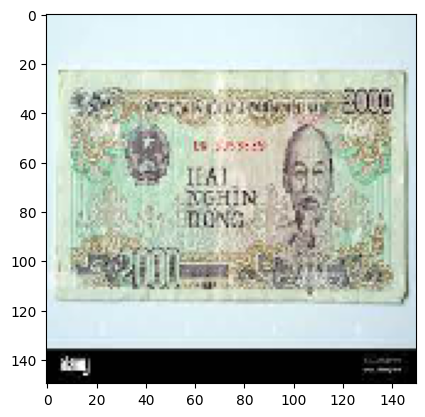

1/1 [==============================] - 0s 30ms/step
10k


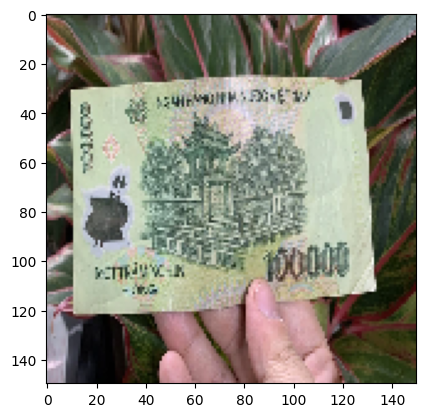

1/1 [==============================] - 0s 43ms/step
0k


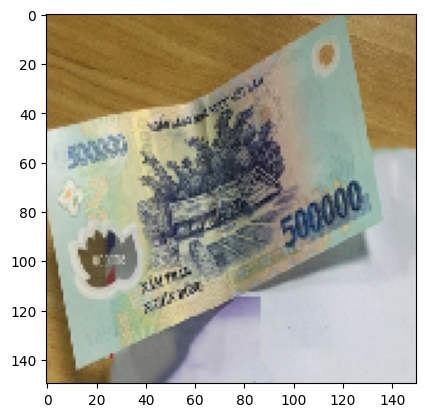

1/1 [==============================] - 0s 29ms/step
0k


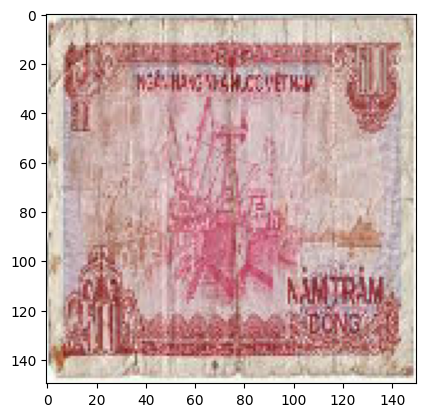

1/1 [==============================] - 0s 32ms/step
10k


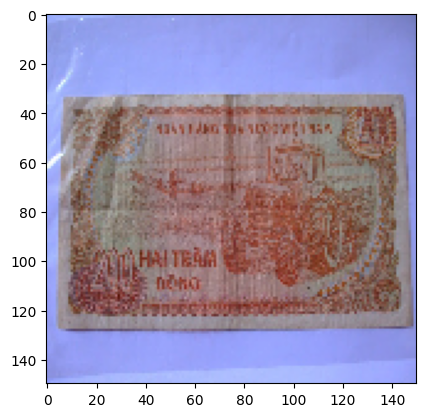

1/1 [==============================] - 0s 26ms/step
50k


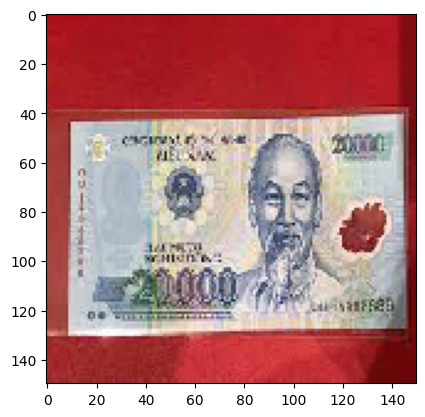

1/1 [==============================] - 0s 30ms/step
2k


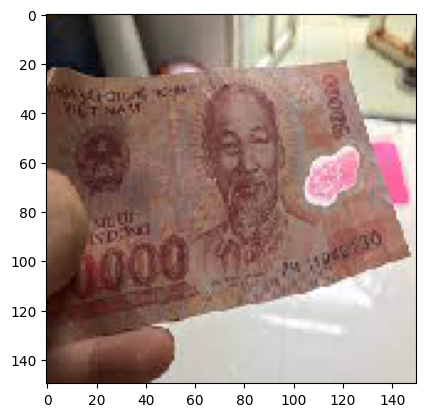

1/1 [==============================] - 0s 28ms/step
500k


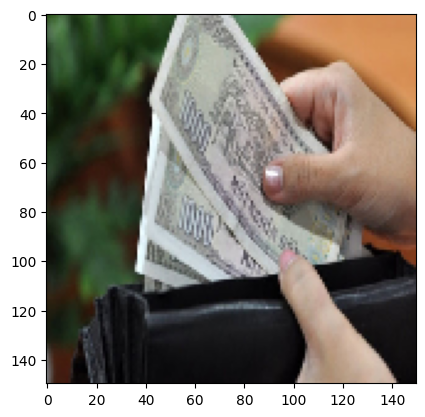

In [78]:
test = '/content/drive/MyDrive/AI 2023/data/VN money/validation'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['0k','200đ','500đ','1k','2k','5k', '10k','20k','50k','100k','200k','500k']
  print(class_name[result])
  plt.show()